In [ ]:
!sudo apt-get install libpcl-dev python3-pcl pcl-tools 

In [33]:
import pcl
import numpy as np
# Load Point Cloud file
cloud = pcl.load_XYZRGBA('tabletop.pcd')


In [34]:
np_cloud = np.empty([cloud.width, 4], dtype=np.float32)
np_cloud = np.asarray(cloud)
np_cloud = cloud.to_array()

In [35]:
# np_cloud

In [36]:
!pcl_viewer tabletop.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading tabletop.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 874.956 ms : 202627 points]
Available dimensions: x y z rgb


In [37]:
# !pip3 install --upgrade git+https://github.com/klintan/pypcd.git

In [38]:
vox = cloud.make_voxel_grid_filter()
LEAF_SIZE = .01
vox.set_leaf_size(LEAF_SIZE, LEAF_SIZE, LEAF_SIZE)
cloud_filtered = vox.filter()
filename = 'voxel_downsampled.pcd'
pcl.save(cloud_filtered, filename)

In [39]:
!pcl_viewer voxel_downsampled.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading voxel_downsampled.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 217.725 ms : 55337 points]
Available dimensions: x y z


In [40]:
passthrough = cloud_filtered.make_passthrough_filter()
filter_axis = 'z'
passthrough.set_filter_field_name(filter_axis)
axis_min = 0.6
axis_max = 1.1
passthrough.set_filter_limits(axis_min, axis_max)
cloud_filtered = passthrough.filter()
filename = 'pass_through_filtered.pcd'
pcl.save(cloud_filtered, filename)

In [41]:
!pcl_viewer pass_through_filtered.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading pass_through_filtered.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 105.231 ms : 16302 points]
Available dimensions: x y z


In [42]:
seg = cloud_filtered.make_segmenter()
seg.set_model_type(pcl.SACMODEL_PLANE)
seg.set_method_type(pcl.SAC_RANSAC)
max_distance = .01
seg.set_distance_threshold(max_distance)
inliers, coefficients = seg.segment()
extracted_inliers = cloud_filtered.extract(inliers, negative=True)
filename = 'extracted_inliers.pcd'
pcl.save(extracted_inliers, filename)

In [43]:
!pcl_viewer pass_through_filtered.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading pass_through_filtered.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 101.165 ms : 16302 points]
Available dimensions: x y z


In [44]:
outlier_filter = cloud_filtered.make_statistical_outlier_filter()
outlier_filter.set_mean_k(50)
x = 1.0
outlier_filter.set_std_dev_mul_thresh(x)
cloud_filtered = outlier_filter.filter()
filename = 'cloud_filtered.pcd'
pcl.save(cloud_filtered,filename)

In [45]:
!pcl_viewer cloud_filtered.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading cloud_filtered.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 97.6101 ms : 14399 points]
Available dimensions: x y z


In [46]:
extracted_outliers = cloud_filtered.extract(inliers, negative=True)
filename = 'extracted_outliers.pcd'
pcl.save(extracted_outliers, filename)

In [47]:
!pcl_viewer extracted_outliers.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading extracted_outliers.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 62.4616 ms : 2518 points]
Available dimensions: x y z


In [50]:
import pcl
cloud_filtered = pcl.load("tabletop.pcd")
outlier_filter = cloud_filtered.make_statistical_outlier_filter()
outlier_filter.set_mean_k(50)
x = 1.0
outlier_filter.set_std_dev_mul_thresh(x)
cloud_filtered = outlier_filter.filter()
filename = 'tabletop_outlier.pcd'
pcl.save(cloud_filtered,filename)

In [51]:
!pcl_viewer tabletop_outlier.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading tabletop_outlier.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 582.224 ms : 187506 points]
Available dimensions: x y z


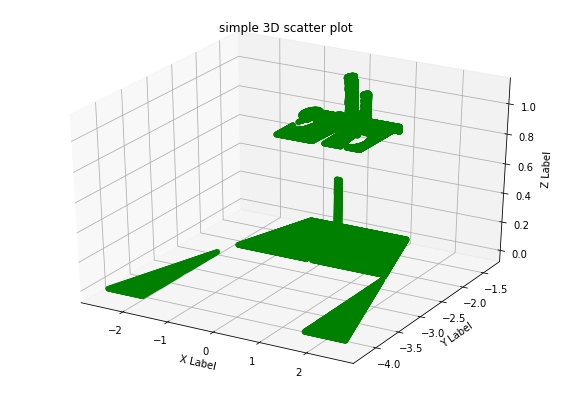

In [7]:
from pypcd import pypcd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

pc = pypcd.PointCloud.from_path("tabletop.pcd")
pc_data = pc.pc_data
pc_array = np.array([pc_data["x"], pc_data["y"], pc_data["z"]], dtype=np.float32)


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(pc_array[0], pc_array[1], pc_array[2], color = "green")
plt.title("simple 3D scatter plot")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()